<a href="https://colab.research.google.com/github/NataMaru/ML_for_people_tasks/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import probplot


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [66]:
cars_df = pd.read_csv('cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [67]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
#?pd.DataFrame.info

In [68]:
# подивимось на загальні відомості про наші дані - тип даих, кіл-ть унікальних значень та наявінсть null значень

summary_df_info = pd.DataFrame({
    'Тип даних': cars_df.dtypes,
    'Унікальні': cars_df.nunique(),
    'Пусті (null)': cars_df.isnull().sum()
})

print(summary_df_info)

                  Тип даних  Унікальні  Пусті (null)
Car_ID                int64        100             0
Brand                object         11             0
Model                object         58             0
Year                  int64          6             0
Kilometers_Driven     int64         18             0
Fuel_Type            object          2             0
Transmission         object          2             0
Owner_Type           object          3             0
Mileage               int64         15             0
Engine                int64         36             0
Power                 int64         40             0
Seats                 int64          3             0
Price                 int64         31             0


In [69]:
cars_df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [70]:
cars_df['Brand'].unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

###Інформація про дані в наборі
В наборі даних 7 числових і 5 категоріальних колонок з них
- 2 бінарні- Transmission та Fuel_Type
- 2 мультикатегоріальних - Brand, Model
- 1 колонка має три значення і вони становляь певний порядок- Owner_Type ( від першого до третього)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [71]:
X, y = cars_df.iloc[:, :-1], cars_df['Price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [73]:
#display(X_train.head(3)), display(X_test.head(3))

In [74]:
#display(y_train.head()), display(y_test.head())

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

###1.кодування банарних колонок

In [75]:
cars_df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,52
Diesel,48


In [76]:
Fuel_Type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_code'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_test['Fuel_Type_code'] = X_test.Fuel_Type.map(Fuel_Type_codes)

In [77]:
#display(X_train['Fuel_Type_code'].value_counts() ), display(X_test['Fuel_Type_code'].value_counts() )

In [78]:
cars_df['Transmission'].value_counts()

,count
Transmission,
Automatic,57
Manual,43


In [79]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_codes'] = X_train.Transmission.map(Transmission_codes)
X_test['Transmission_codes'] = X_test.Transmission.map(Transmission_codes)


In [80]:
#display(X_train['Transmission_codes'].value_counts() ), display(X_test['Transmission_codes'].value_counts() )

###2.Brand + sklearn.preprocessing.OneHotEncoder

In [81]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [82]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
one_hot_test = enc.transform(X_test[['Brand']]).toarray()


In [83]:
X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test

In [84]:
display(X_train.head() ), display(X_test.head() )

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

In [85]:

from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [86]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [87]:
X_train = X_train.select_dtypes(include=['number'])
X_test= X_test.select_dtypes(include=['number'])
#display(X_train.head()), display(X_test.head())

In [88]:
X_y_train_concat=pd.concat([X_train, y_train], axis=1)
X_y_train_concat.head()


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000


In [89]:
#загальна матриця кореляції
matrix = X_y_train_concat.corr()
matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_code,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_codes,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858


In [90]:
#виведемо окремо абсолютне значення кореляції до цільової змінної
correlations = X_y_train_concat.corr()['Price'].abs()
correlations

,Price
Car_ID,0.025560
Year,0.233769
Kilometers_Driven,0.083951
Mileage,0.638404
Engine,0.710561
Power,0.849137
Seats,0.000979
Fuel_Type_code,0.110782
Transmission_codes,0.680731
Audi,0.328858


In [91]:
#залишимо лише фічі які мають кореляцію вище за 0.5
top_features = correlations[correlations > 0.5].drop('Price').index.tolist()
print(top_features)

['Mileage', 'Engine', 'Power', 'Transmission_codes']


###висновок
абсолютну кореляцію вищу за 0.5 мають наступні фічі: 'Mileage', 'Engine', 'Power', 'Transmission_codes'

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [92]:
# Створюємо і тренуємо модель на train
model = LinearRegression().fit(X_train, y_train)

In [93]:
#передбачення на X_train, X_test
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [94]:
rmse_train = root_mean_squared_error(predictions_train, y_train)
rmse_test = root_mean_squared_error(predictions_test, y_test)
print('rmse_train: ', rmse_train)
print('rmse_test: ', rmse_test)

rmse_train:  210293.57828151877
rmse_test:  258181.56112032934


### зобразимо графіки помилок для тренувального і тестового набору

In [95]:
errors_train = y_train - predictions_train
errors_test = y_test - predictions_test

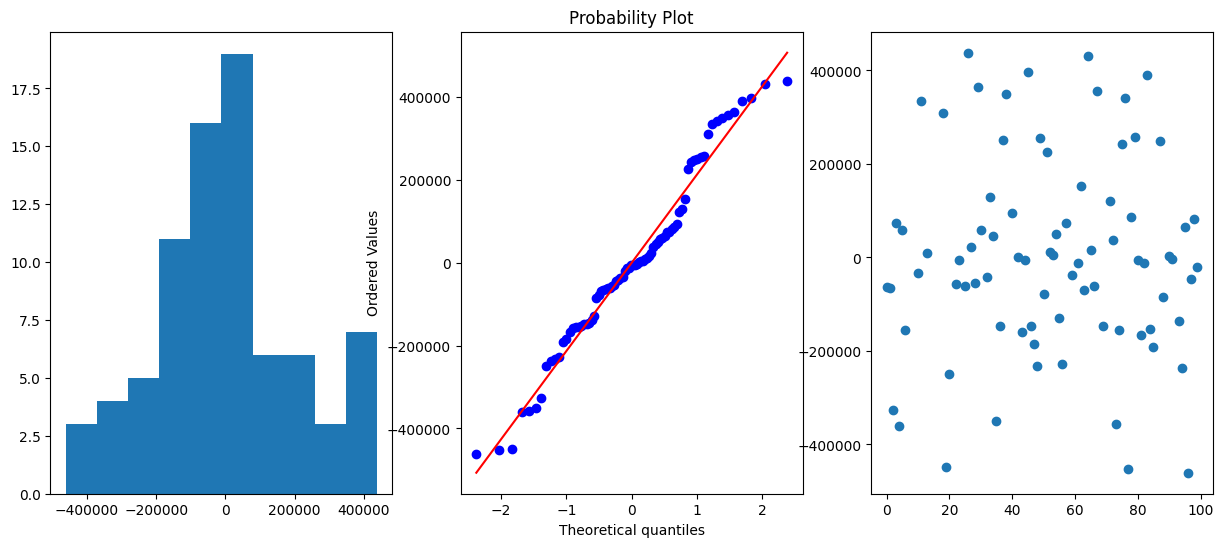

In [96]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(errors_train)
plt.subplot(1,3,2)
probplot(errors_train, dist='norm', plot=plt)
plt.subplot(1,3,3)
plt.plot(errors_train, 'o');

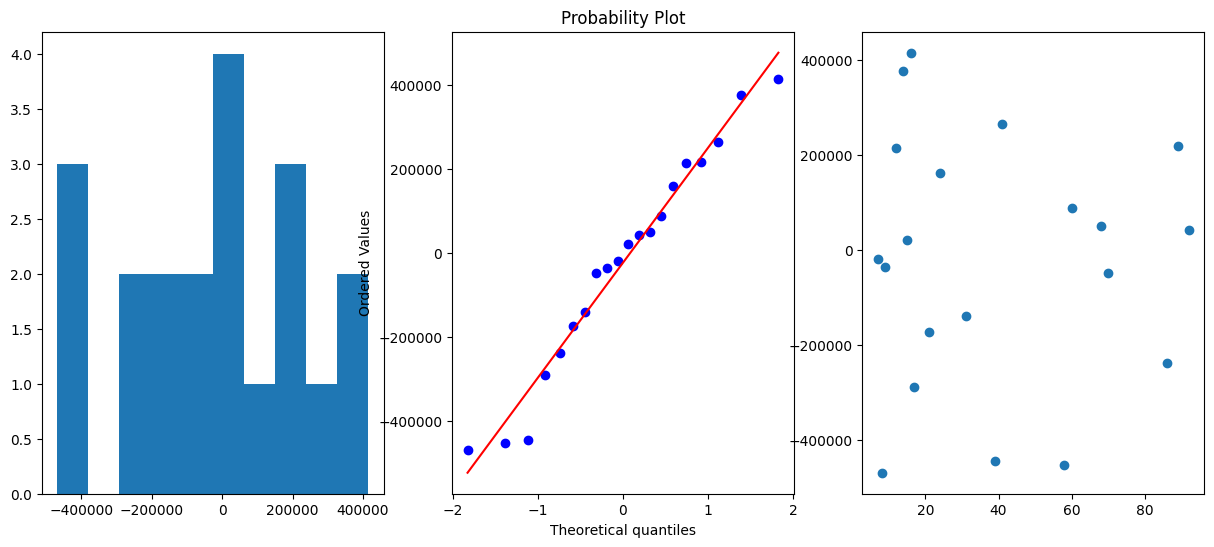

In [97]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(errors_test)
plt.subplot(1,3,2)
probplot(errors_test, dist='norm', plot=plt)
plt.subplot(1,3,3)
plt.plot(errors_test, 'o');

###спостереження
1. RMSE помилка на тестових даних більша ніж на тренувальних
2. якщо подивитись на гістограму помилок, то ми правильно предіктимо певну частину даних, але хвіст з великими помилками все ж таки присутній. Тому модель не є якісною і варто її покращити
3. також варто відмітити те, що залишки не є нормальними, але виглядають гомоскедастичними

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [98]:
numeric_cols_name = cars_df.select_dtypes(include=['number']).columns.tolist()

print(numeric_cols_name)

['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [99]:
numeric_cols=['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
scaler = StandardScaler()

scaler.fit(X_train[numeric_cols])
scaled_X_train= scaler.transform(X_train[numeric_cols])
scaled_X_test=scaler.transform(X_test[numeric_cols])
#display(scaled_X_train),display(scaled_X_test)

In [100]:
all_cols_name = X_train.columns.tolist()

print(all_cols_name)

['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type_code', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes']


In [101]:
cat_cols = ['Fuel_Type_code', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes']
categorical_data_train = X_train[cat_cols].values
categorical_data_test = X_test[cat_cols].values

In [102]:
X_train = np.concatenate((scaled_X_train, categorical_data_train), axis=1)
X_test = np.concatenate((scaled_X_test, categorical_data_test), axis=1)
column_names = numeric_cols + cat_cols
X_train = pd.DataFrame(X_train, columns=column_names)
X_test = pd.DataFrame(X_test, columns=column_names)
display(X_train.head()), display(X_test.head())

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,1.090928,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.100381,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.925542,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.065005,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-1.173178,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,-1.243932,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.394892,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.409318,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-1.350062,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.560278,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [103]:
model = LinearRegression().fit(X_train, y_train)
#передбачення на X_train, X_test
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [104]:
model.coef_

array([   5608.68542149,   -8765.64571392,  -94398.72148597,
       -131715.51202972,  -21377.45333789,  496769.21489874,
         -2148.92454899, -367810.99671944,  239529.36552271,
        756997.38551445,  731220.83276689, -302439.92692503,
       -187580.54148478, -506581.95787563, -575037.20004416,
       -392102.82194266,  736415.66839723, -127890.33404062,
        124349.23132335, -257350.33568905,   64763.98950579])

In [105]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,1.601956e+06
9,Audi,7.569974e+05
16,Mercedes,7.364157e+05
10,BMW,7.312208e+05
5,Power,4.967692e+05
8,Transmission_codes,2.395294e+05
18,Toyota,1.243492e+05
20,Owner_Type_Codes,6.476399e+04
0,Car_ID,5.608685e+03
6,Seats,-2.148925e+03


In [106]:
rmse_train = root_mean_squared_error(predictions_train, y_train)
rmse_test = root_mean_squared_error(predictions_test, y_test)
print('rmse_train: ', rmse_train)
print('rmse_test: ', rmse_test)

rmse_train:  210293.57828151854
rmse_test:  258181.56112032695


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [107]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

In [108]:
X_test = sm.add_constant(X_test)

In [109]:
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)


In [110]:

model = sm.OLS(y_train,X_train)
results = model.fit()
results.params.sort_values(ascending=False)

,0
const,1.468459e+06
Audi,8.904937e+05
Mercedes,8.699120e+05
BMW,8.647171e+05
Power,4.967692e+05
Toyota,2.578455e+05
Transmission_codes,2.395294e+05
Owner_Type_Codes,6.476399e+04
Car_ID,5.608685e+03
Tata,5.605974e+03


In [111]:
y_pred_train = results.predict(X_train)
y_pred_test= results.predict(X_test)

In [112]:

rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_train, y_pred_train)
r2_train = r2_score(y_test, y_pred_test)

print(f"Тестовий R2 test: {r2_test:.4f}")
print(f"Тестовий RMSE test: {rmse_test:.4f}")
print(f"Тестовий R2 train: {r2_train:.4f}")
print(f"Тестовий RMSE train: {rmse_train:.4f}")
print(results.summary())

Тестовий R2 test: 0.9586
Тестовий RMSE test: 258181.5611
Тестовий R2 train: 0.8526
Тестовий RMSE train: 210293.5783
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           2.01e-33
Time:                        15:08:56   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------

In [113]:
p_values = results.pvalues
insignificant_features = p_values[p_values <=0.05].index.tolist()

print("Значущі колонки:", insignificant_features)

Значущі колонки: ['const', 'Mileage', 'Power', 'Fuel_Type_code', 'Transmission_codes', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota']


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [114]:
X_train_ins = X_train[insignificant_features]
X_test_ins = X_test[insignificant_features]


In [115]:

model_ins = sm.OLS(y_train,X_train_ins)
results_ins = model_ins.fit()


In [116]:
y_pred_train_ins = results_ins.predict(X_train_ins)
y_pred_test_ins= results_ins.predict(X_test_ins)

In [117]:
rmse_train_ins = root_mean_squared_error(y_train, y_pred_train_ins)
rmse_test_ins = root_mean_squared_error(y_test, y_pred_test_ins)
r2_test_ins = r2_score(y_train, y_pred_train_ins)
r2_train_ins = r2_score(y_test, y_pred_test_ins)

print(f"Тестовий R2 test_ins: {r2_test_ins:.4f}")
print(f"Тестовий R2 test: {r2_test:.4f}")
print(f"Тестовий RMSE test_ins: {rmse_test_ins:.4f}")
print(f"Тестовий RMSE test: {rmse_test:.4f}")
print(f"----------------------------------------")

print(f"Тестовий R2 train_ins: {r2_train_ins:.4f}")
print(f"Тестовий R2 train: {r2_train:.4f}")
print(f"Тестовий RMSE train_ins: {rmse_train_ins:.4f}")
print(f"Тестовий RMSE train: {rmse_train:.4f}")
print(f"----------------------------------------")

print(results_ins.summary())

Тестовий R2 test_ins: 0.9543
Тестовий R2 test: 0.9586
Тестовий RMSE test_ins: 253952.6855
Тестовий RMSE test: 258181.5611
----------------------------------------
Тестовий R2 train_ins: 0.8574
Тестовий R2 train: 0.8526
Тестовий RMSE train_ins: 220898.5961
Тестовий RMSE train: 210293.5783
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           4.53e-41
Time:                        15:08:56   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11 

###перевіримо на нормальність та гомоскедастичність наші залишки

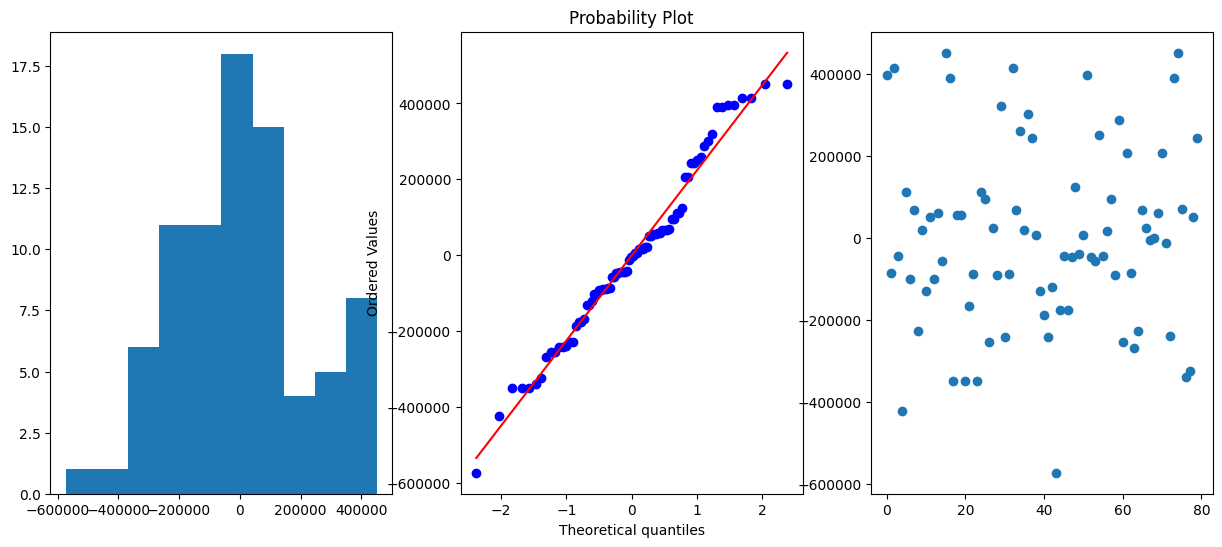

In [118]:
errors_train_ins = y_train - y_pred_train_ins
errors_test_ins = y_test - y_pred_test_ins

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(errors_train_ins)
plt.subplot(1,3,2)
probplot(errors_train_ins, dist='norm', plot=plt)
plt.subplot(1,3,3)
plt.plot(errors_train_ins, 'o');

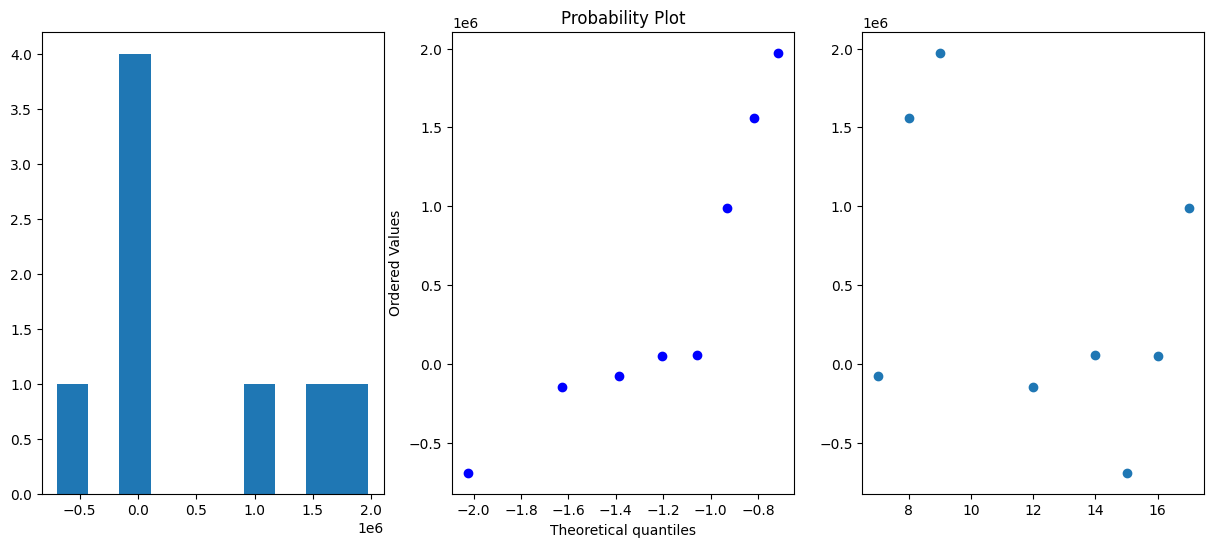

In [119]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(errors_test_ins)
plt.subplot(1,3,2)
probplot(errors_test_ins, dist='norm', plot=plt)
plt.subplot(1,3,3)
plt.plot(errors_test_ins, 'o');

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [120]:
p_values = results.pvalues
insignificant_features_2 = p_values[p_values <0.25].index.tolist()
print(insignificant_features_2)

['const', 'Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_code', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota']


In [121]:
X_train_ins_2 = X_train[insignificant_features_2]
X_test_ins_2 = X_test[insignificant_features_2]

In [122]:

model_ins_2 = sm.OLS(y_train,X_train_ins_2)
results_ins_2 = model_ins_2.fit()

In [123]:
y_pred_train_ins_2 = results_ins_2.predict(X_train_ins_2)
y_pred_test_ins_2= results_ins_2.predict(X_test_ins_2)

In [124]:
rmse_train_ins_2 = root_mean_squared_error(y_train, y_pred_train_ins_2)
rmse_test_ins_2 = root_mean_squared_error(y_test, y_pred_test_ins_2)
r2_test_ins_2 = r2_score(y_train, y_pred_train_ins_2)
r2_train_ins_2 = r2_score(y_test, y_pred_test_ins_2)

print(f"Тестовий R2 test_ins_2: {r2_test_ins_2:.4f}")
print(f"Тестовий R2 test_ins: {r2_test_ins:.4f}")
print(f"Тестовий R2 test: {r2_test:.4f}")
print(f"----------------------------------------")
print(f"Тестовий RMSE test_ins_2: {rmse_test_ins_2:.4f}")
print(f"Тестовий RMSE test_ins: {rmse_test_ins:.4f}")
print(f"Тестовий RMSE test: {rmse_test:.4f}")
print(f"----------------------------------------")

print(f"Тестовий R2 train_ins_2: {r2_train_ins_2:.4f}")
print(f"Тестовий R2 train_ins: {r2_train_ins:.4f}")
print(f"Тестовий R2 train: {r2_train:.4f}")
print(f"----------------------------------------")

print(f"Тестовий RMSE train_ins_2: {rmse_train_ins_2:.4f}")
print(f"Тестовий RMSE train_ins: {rmse_train_ins:.4f}")
print(f"Тестовий RMSE train: {rmse_train:.4f}")
print(f"----------------------------------------")

print(results_ins_2.summary())

Тестовий R2 test_ins_2: 0.9578
Тестовий R2 test_ins: 0.9543
Тестовий R2 test: 0.9586
----------------------------------------
Тестовий RMSE test_ins_2: 249807.0549
Тестовий RMSE test_ins: 253952.6855
Тестовий RMSE test: 258181.5611
----------------------------------------
Тестовий R2 train_ins_2: 0.8620
Тестовий R2 train_ins: 0.8574
Тестовий R2 train: 0.8526
----------------------------------------
Тестовий RMSE train_ins_2: 212333.7513
Тестовий RMSE train_ins: 220898.5961
Тестовий RMSE train: 210293.5783
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.3
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           4.40e-40
Time:                        15:08:57   Log-Likelihoo

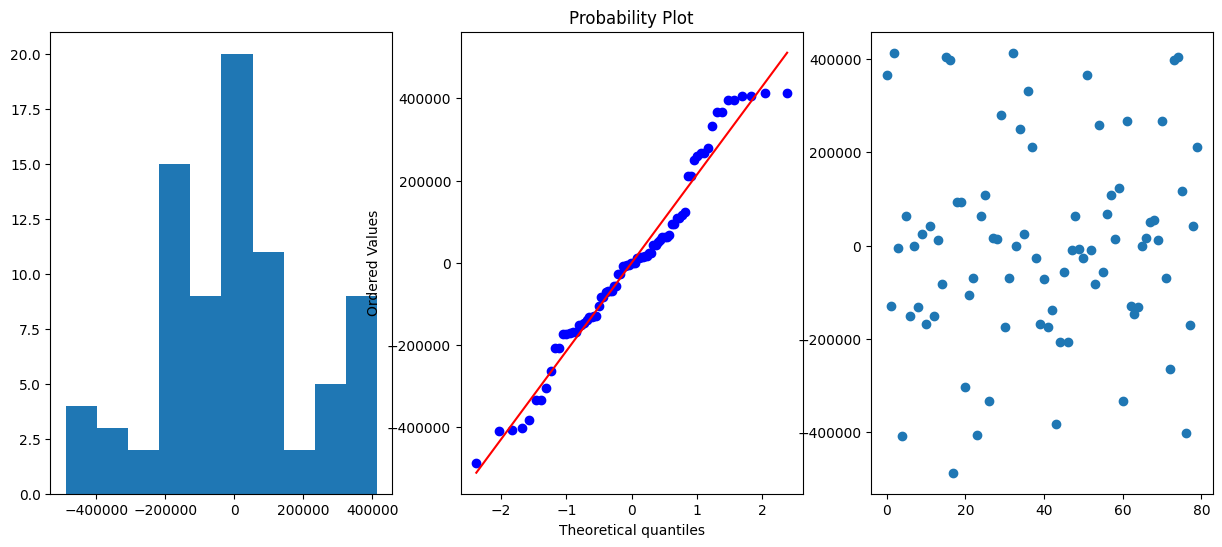

In [125]:
errors_train_ins_2 = y_train - y_pred_train_ins_2
errors_test_ins_2 = y_test - y_pred_test_ins_2

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(errors_train_ins_2)
plt.subplot(1,3,2)
probplot(errors_train_ins_2, dist='norm', plot=plt)
plt.subplot(1,3,3)
plt.plot(errors_train_ins_2, 'o');

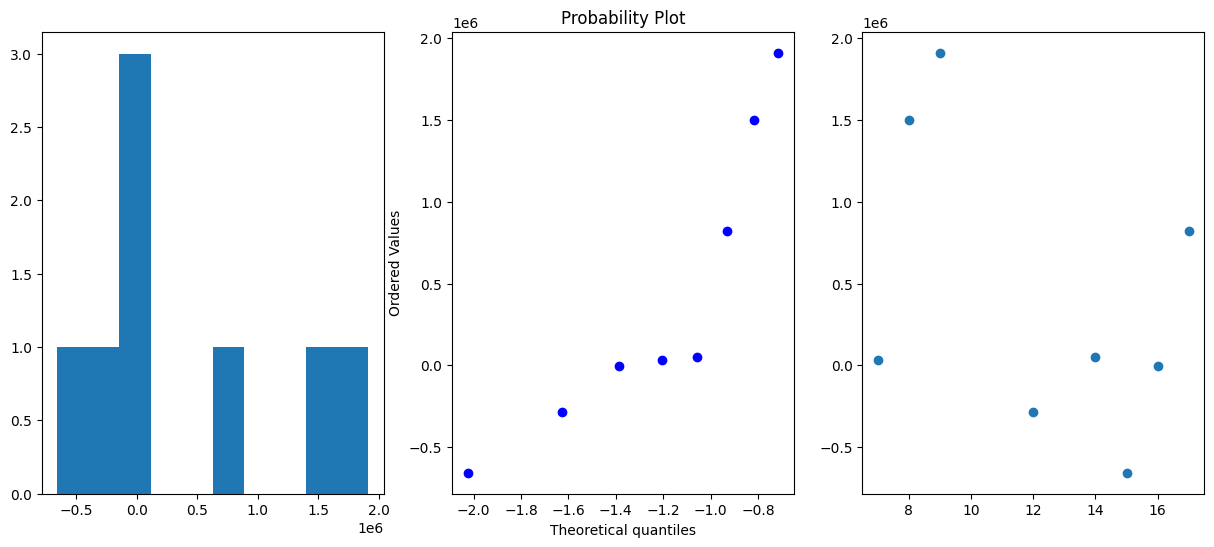

In [126]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(errors_test_ins_2)
plt.subplot(1,3,2)
probplot(errors_test_ins_2, dist='norm', plot=plt)
plt.subplot(1,3,3)
plt.plot(errors_test_ins_2, 'o');

###висновки
1. з огляду на значення R2  на тестовому датасеті модель показує кращий результат ніж на тренувальному, що трохи дивує.
  -  R2 test_ins_2: 0.9578
  -  R2 test_ins: 0.9543
  -  R2 test: 0.9586
----------------------------------------
  - R2 train_ins_2: 0.8620
  -  R2 train_ins: 0.8574
  - R2 train: 0.8526

2. якщо подивитись на RMSE, то значення на тренувальних даних менше ніж на тестових, але на тестових даних помилка з відбором значущих фіч зменшувалась, а у випадку з тренувальними перша модель з усіма фічами показала кращий результат.
----------------------------------------
 - RMSE test_ins_2: 249807.0549
 - RMSE test_ins: 253952.6855
 - RMSE test: 258181.5611

----------------------------------------
 - RMSE train_ins_2: 212333.7513
 - RMSE train_ins: 220898.5961
 - RMSE train: 210293.5783

 3. Узагальнивши результати виглядає так наче модель гарно вивчила структуру даних і гарно вгадує на маленькому за обсягом  тестовому наборі.

 4. Для проду, як mvp взяла б третій варіант моделі (ins_2) оскільки на тестови даних RMSE має найнижче значення і при цьому R2 має високий показник
5. якщо подивитись на помилки, то графіки не показують нормального розподілу
6. з приводу гомоскедастичності, то не показують наявну гетероскедастичність, але присутні певне скупчення біля умовної лінії y=0 і точкові викиди.
